In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
import datetime
import scipy

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [8]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [9]:
df.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

<h1>EDA</h1>

In [10]:
# plt.figure(figsize=(6,4))
# sns.heatmap(df.corr(),cmap='Blues',annot=False)

<AxesSubplot: >

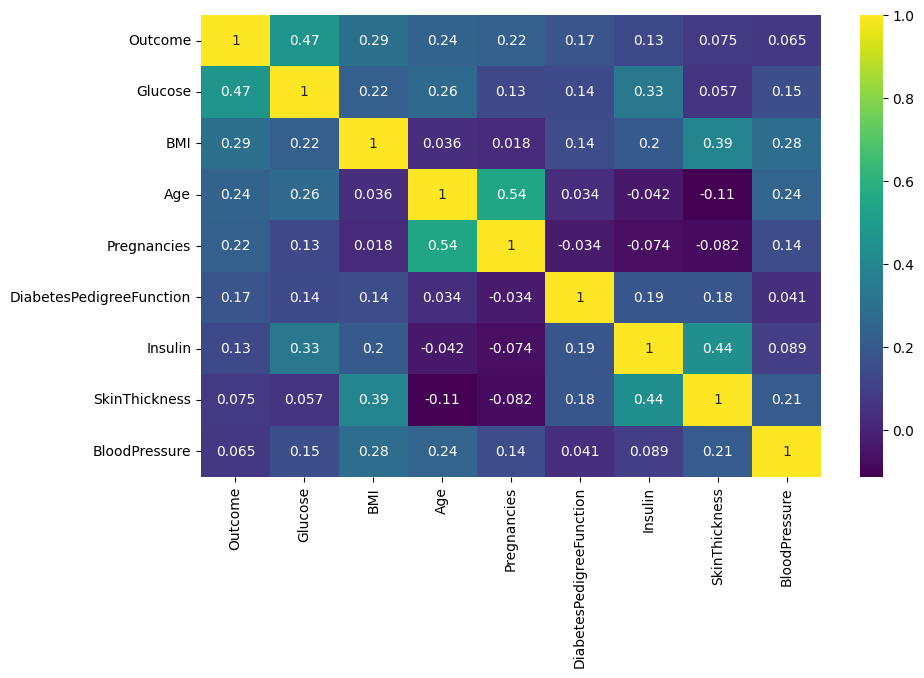

In [11]:
k = 9
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

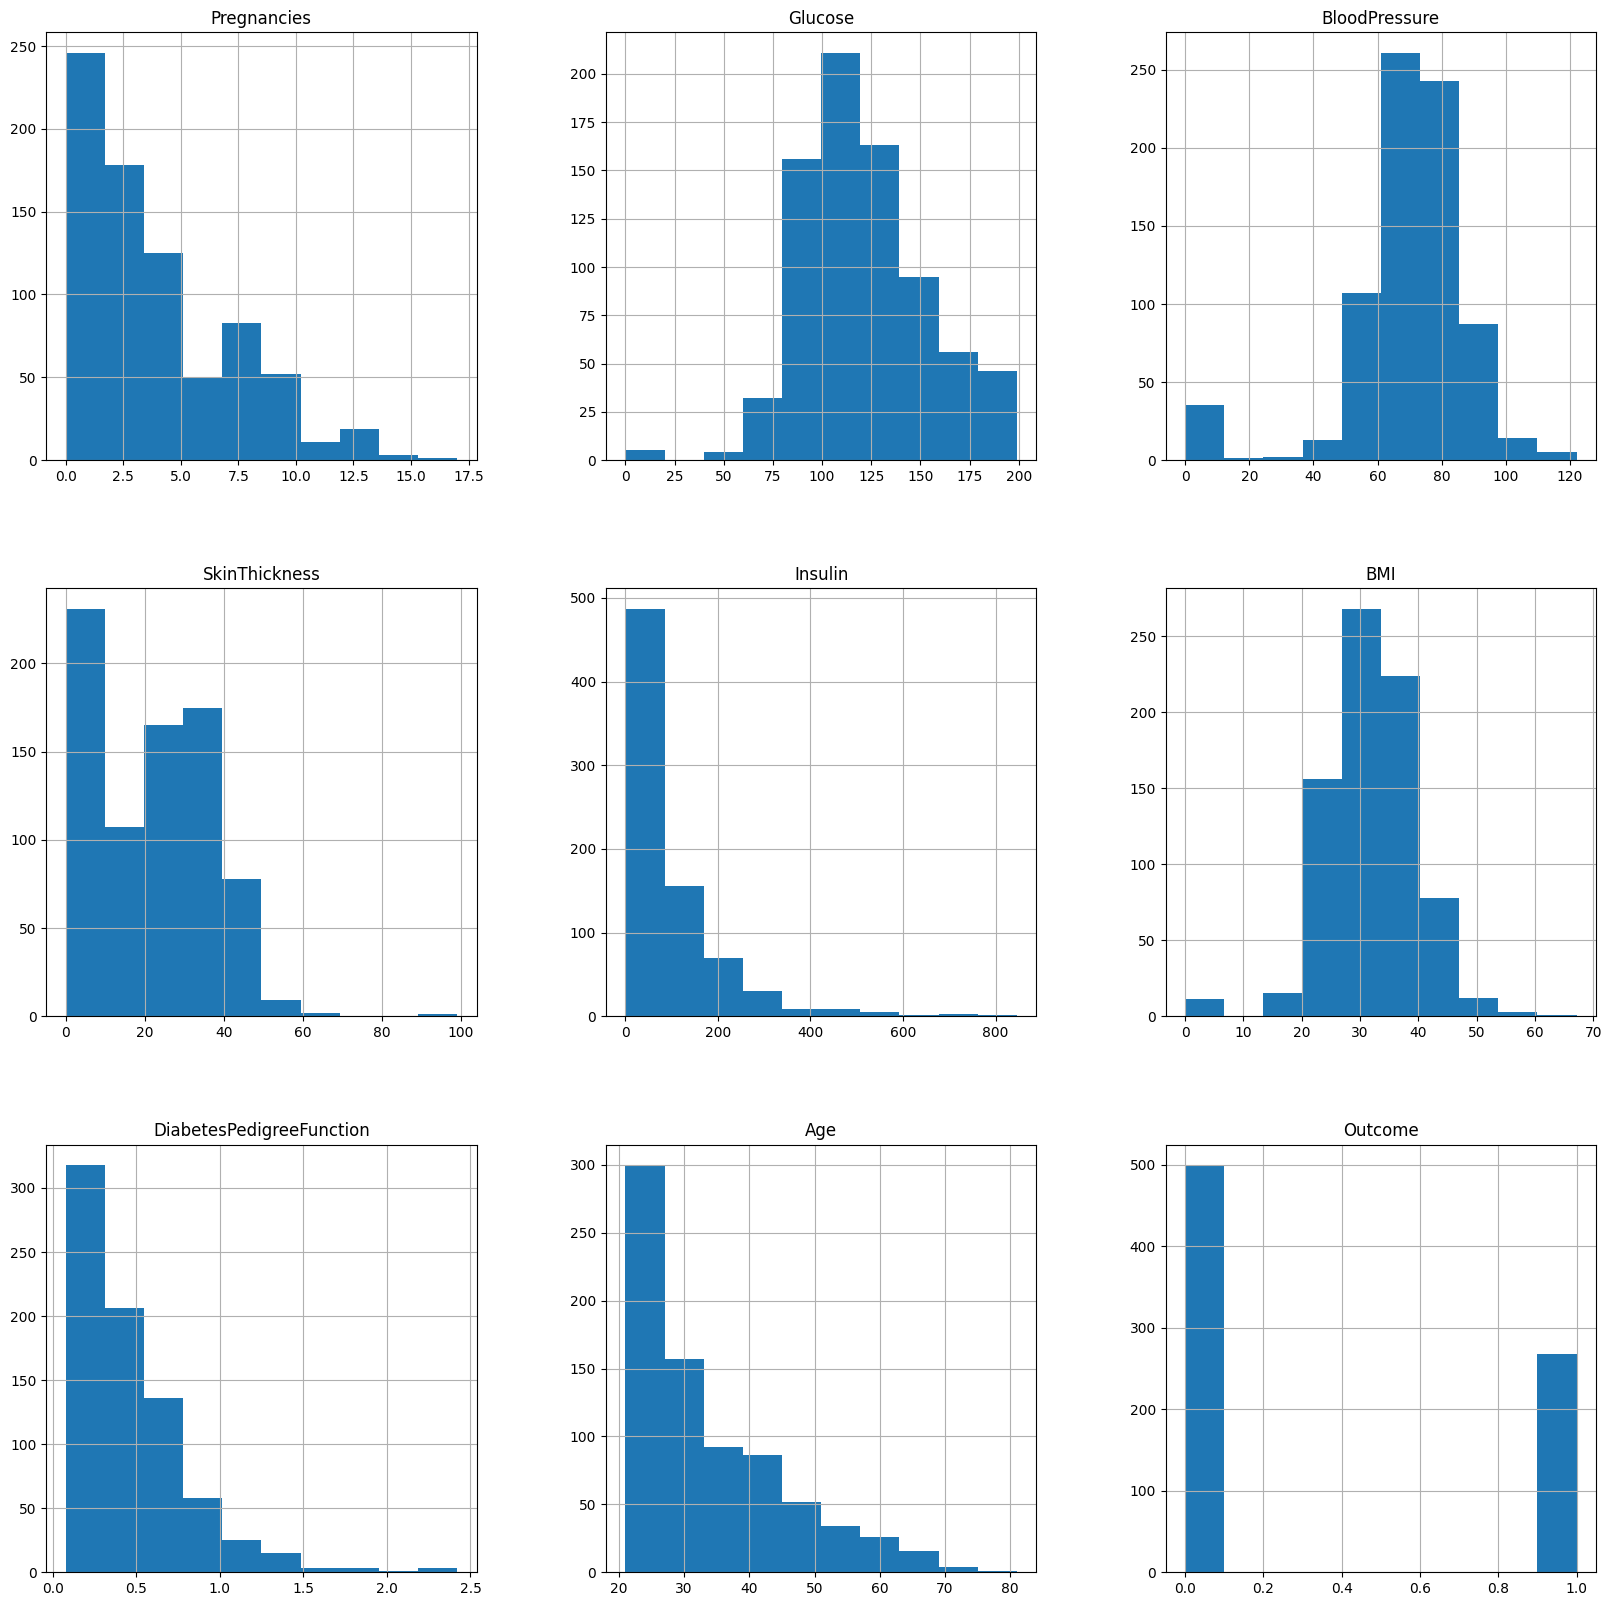

In [12]:
df.hist(figsize = (20,20))

In [13]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h1>Finding outlier in columns</h1>
<br>
<h4>the next code column i saw in many notebooks so tried it out here as well</h4> 

In [17]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "this variable has outliers")
for col in df.columns:
    has_outliers(df, col)


SkinThickness this variable has outliers
Insulin this variable has outliers
DiabetesPedigreeFunction this variable has outliers


Replacing the outlying data with threshhold values

In [18]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(df, df.columns)
for col in df.columns:
    has_outliers(df, col)
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.055990,8.671056,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,73.000
Insulin,768.0,138.839844,75.233052,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,424.50000,424.500
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.470082,0.322171,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,1.949
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.000


<h3>Encoding categorical features as a one-hot numeric array ... this is needed for feeding categorical data to scikit-learn linear models </h3>

In [19]:
df['New_Glucose_Class'] = pd.cut(x=df['Glucose'], bins=[0,139,200],labels = ["Normal","Prediabetes"])
df['New_BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])
df['New_BloodPressure'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,123],labels = ["Normal","HS1","HS2"])
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [20]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

categorical_columns = [col for col in df.columns
                           if len(df[col].unique()) <= 10
                      and col != "Outcome"]
categorical_columns


['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [21]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healty',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healty,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,1,0,0,1,0,0,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,0,0,1,0,0,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,1,1,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,0,1,0,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,0,0,0,1,0,0,0


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Outcome                        768 non-null    float64
 9   New_Glucose_Class_Prediabetes  768 non-null    uint8  
 10  New_BMI_Range_Healty           768 non-null    uint8  
 11  New_BMI_Range_Overweight       768 non-null    uint8  
 12  New_BMI_Range_Obese            768 non-null    uin

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]
log_model = LogisticRegression(solver='newton-cg', class_weight='balanced').fit(X, y)

log_model.intercept_            
log_model.coef_

y_pred = log_model.predict(X)

In [26]:
cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])


#report of accuracy, precision, recall and f1 score.
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       500
         1.0       0.69      0.81      0.74       268

    accuracy                           0.80       768
   macro avg       0.79      0.81      0.79       768
weighted avg       0.82      0.80      0.81       768



Logistic regression model and accuracy score using cross validation

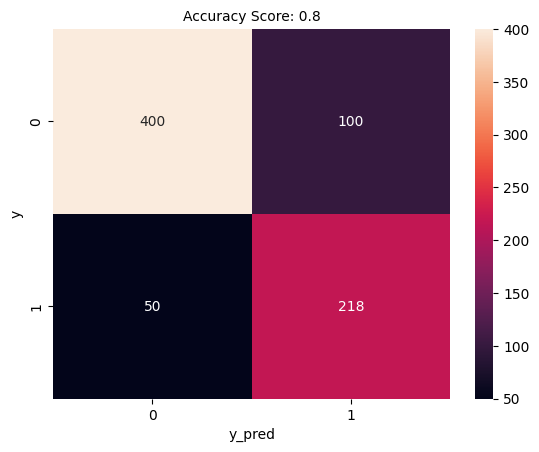

In [27]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [28]:
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob) 


0.8750597014925374